In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

## Exploring Dataset emails_spam.csv

In [18]:
df = pd.read_csv('../dataset/emails_spam.csv')
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [20]:
df['text'] = df['text'].str.replace(r'(?i)^Subject:\s*', '', regex=True)

In [21]:
df.head(10)

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1
5,"great nnews hello , welcome to medzonline sh ...",1
6,here ' s a hot play in motion homeland securi...,1
7,save your money buy getting this thing here y...,1
8,undeliverable : home based business for grownu...,1
9,save your money buy getting this thing here y...,1


In [22]:
df[df['spam'] == 1].count()

text    1368
spam    1368
dtype: int64

In [23]:
df[df['spam'] == 0].count() / df.shape[0]

text    0.761173
spam    0.761173
dtype: float64

## Exploring Dataset emails_spam_2.csv

In [24]:
df_2 = pd.read_csv('../dataset/emails_spam_2.csv')
df_2.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [25]:
df_2.drop(columns=['label'], inplace=True)

In [26]:
df_2 = df_2.rename(columns={'label_num': 'spam'})

In [27]:
df_2 = df_2.iloc[:, 1:]
df_2.head(10)

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
5,Subject: ehronline web address change\r\nthis ...,0
6,Subject: spring savings certificate - take 30 ...,0
7,Subject: looking for medication ? we ` re the ...,1
8,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [28]:
df_2['text'] = df_2['text'].str.replace(r'(?i)^Subject:\s*', '', regex=True)

In [29]:
df_2['text'] = df_2['text'].str.replace(r'[\r\n]+', ' ', regex=True)
df_2.head(10)

,text,spam
0,enron methanol ; meter # : 988291 this is a fo...,0
1,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,"neon retreat ho ho ho , we ' re around to that...",0
3,"photoshop , windows , office . cheap . main tr...",1
4,re : indian springs this deal is to book the t...,0
5,ehronline web address change this message is i...,0
6,spring savings certificate - take 30 % off sav...,0
7,looking for medication ? we ` re the best sour...,1
8,noms / actual flow for 2 / 26 we agree - - - -...,0
9,"nominations for oct . 21 - 23 , 2000 ( see att...",0


In [30]:
df_2_spam = df_2[df_2['spam'] == 1]
df_2_spam.count()

text    1499
spam    1499
dtype: int64

## Exploring Dataset text_spam.csv

In [31]:
df_3 = pd.read_csv('../dataset/text_spam.csv', encoding='ISO-8859-1')
df_3.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [32]:
df_3 = df_3.iloc[:, 0:2]
df_3['v1'] = df_3['v1'].map({'spam' : 1, 'ham' : 0})
df_3.rename(columns={'v1':'spam', 'v2':'text'}, inplace=True)
df_3.head(10)

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [33]:
df_3_spam = df[df['spam'] == 1]
df_3_spam = df_3_spam[['text', 'spam']]
df.head(10)

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1
5,"great nnews hello , welcome to medzonline sh ...",1
6,here ' s a hot play in motion homeland securi...,1
7,save your money buy getting this thing here y...,1
8,undeliverable : home based business for grownu...,1
9,save your money buy getting this thing here y...,1


## Exploring Dataset email_spam_indo.csv

In [34]:
df_4_spam = pd.read_csv('../dataset/email_spam_indo.csv')
df_4_spam.head(10)

,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."
5,spam,"Nnews yang hebat halo, selamat datang di medzo..."
6,spam,Berikut ini adalah permainan panas di Investme...
7,spam,Simpan uang Anda beli untuk mendapatkan barang...
8,spam,Tidak Terkirim: Bisnis Berbasis Rumah Untuk Or...
9,spam,Simpan uang Anda beli untuk mendapatkan barang...


In [35]:
df_4_spam = df_4_spam.iloc[:, 0:2]
df_4_spam['Kategori'] = df_4_spam['Kategori'].map({'spam' : 1, 'ham' : 0})
df_4_spam.head(10)
df_4_spam.rename(columns={'Kategori':'spam', 'Pesan':'text'}, inplace=True)
df_4_spam = df_4_spam[['text', 'spam']]
df_4_spam.head(10)

,text,spam
0,Secara alami tak tertahankan identitas perusah...,1
1,Fanny Gunslinger Perdagangan Saham adalah Merr...,1
2,Rumah -rumah baru yang luar biasa menjadi muda...,1
3,4 Permintaan Khusus Pencetakan Warna Informasi...,1
4,"Jangan punya uang, dapatkan CD perangkat lunak...",1
5,"Nnews yang hebat halo, selamat datang di medzo...",1
6,Berikut ini adalah permainan panas di Investme...,1
7,Simpan uang Anda beli untuk mendapatkan barang...,1
8,Tidak Terkirim: Bisnis Berbasis Rumah Untuk Or...,1
9,Simpan uang Anda beli untuk mendapatkan barang...,1


## Merge emails_spam and emails_spam_2 to Tackle Imbalance Problem

In [36]:
spam_df = pd.concat([df, df_2_spam, df_3_spam, df_4_spam], ignore_index=True)
spam_df[spam_df['spam'] == 1].count()

text    5603
spam    5603
dtype: int64

In [37]:
spam_df[spam_df['spam'] == 0].count()

text    5628
spam    5628
dtype: int64

In [38]:
spam_df.head(10)

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1
5,"great nnews hello , welcome to medzonline sh ...",1
6,here ' s a hot play in motion homeland securi...,1
7,save your money buy getting this thing here y...,1
8,undeliverable : home based business for grownu...,1
9,save your money buy getting this thing here y...,1


In [39]:
spam_df.isna().sum()

text    0
spam    0
dtype: int64

In [40]:
spam_df.to_csv('../dataset/final_dataset_ada_indo.csv', index=False)

## Building Machine Learning Model

In [41]:
df = pd.read_csv('../dataset/final_dataset_ada_indo.csv')

In [42]:
df = df.dropna()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.25, random_state=42, shuffle=True)

In [46]:
indonesian_stopwords = [
    "ada", "adalah", "adanya", "agar", "akan", "aku", "akui", "anda", "antara", "apa", "apabila",
    "apakah", "atau", "bagaimana", "bagaimanapun", "bagi", "bahwa", "bahwasanya", "baik", "banyak",
    "barang", "berada", "berbagai", "berkata", "berkenaan", "bersama", "bersama-sama", "beserta",
    "betul", "bila", "bilamana", "bisa", "bukan", "bukankah", "bukanlah", "demikian", "dengan",
    "disebabkan", "disebut", "disebutkan", "dst", "dsb", "engkau", "guna", "hal", "hampir", "hanya",
    "harus", "hendak", "hingga", "ia", "ialah", "ibarat", "itu", "jangan", "jika", "jikalau", "juga",
    "justru", "kami", "karena", "kecuali", "kecil", "kebanyakan", "kemudian", "kini", "kita", "lagi",
    "lalu", "lama", "lanjut", "lebih", "macam", "maka", "maka", "malah", "malahan", "masih", "masing",
    "melainkan", "memang", "mempunyai", "menurut", "mereka", "meskipun", "mungkin", "nah", "namun",
    "nanti", "nyaris", "oleh", "pada", "padahal", "paling", "para", "per", "pernah", "perlu", "pun",
    "rupanya", "saat", "saja", "saling", "sama", "sampai", "sangat", "sebab", "sebagai", "sebagaimana",
    "sebagian", "sebaliknya", "sebelum", "sementara", "sempat", "sempurna", "sempurnakan", "sendiri",
    "seolah", "seperti", "sering", "serta", "sesuatu", "sesungguhnya", "sesuai", "setelah", "setiap",
    "setidaknya", "siapa", "sini", "suatu", "sungguh", "supaya", "tadi", "tak", "tampaknya", "tanpa",
    "telah", "tentang", "terhadap", "terutama", "tetapi", "tidak", "tiba", "tiba-tiba", "tidakkah",
    "tidaklah", "toh", "untuk", "walau", "walaupun", "ya", "yaitu", "yakni", "yang"
]

english_stopwords = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are",
    "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both",
    "but", "by", "can", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does",
    "doesn't", "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had",
    "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
    "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll",
    "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me",
    "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only",
    "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she",
    "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
    "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they",
    "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under",
    "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't",
    "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom",
    "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've",
    "your", "yours", "yourself", "yourselves"
]

all_stopwords = list(indonesian_stopwords + english_stopwords)

In [47]:
tf_idf = TfidfVectorizer(stop_words=all_stopwords, max_features=1000)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.fit_transform(X_test)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [ ]:
# dump(tf_idf, 'svm_vectorizer_spam.joblib')

['svm_vectorizer_spam.joblib']

In [48]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': randint(3, 6),  # Random integer between 3 and 5
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
}

In [49]:
svc = SVC()

random_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train_tfidf, y_train)

print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True, 'tol': 0.0001}


In [53]:
svm_model = SVC(C=10, degree=4, gamma='scale', kernel='rbf', shrinking=True, tol=0.0001, probability=True)
svm_model.fit(X_train_tfidf, y_train)

SVC(C=10, degree=4, probability=True, tol=0.0001)

In [54]:
y_pred = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1402
           1       0.72      0.65      0.68      1402

    accuracy                           0.70      2804
   macro avg       0.70      0.70      0.70      2804
weighted avg       0.70      0.70      0.70      2804



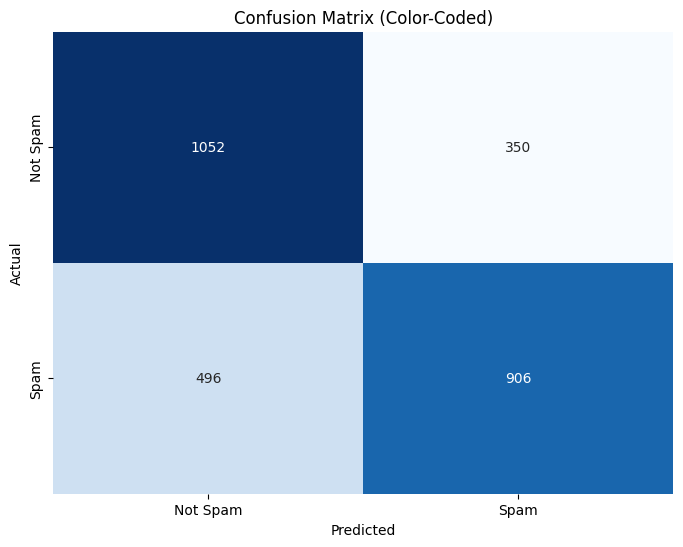

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Color-Coded)')
plt.show()

In [ ]:
# dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [82]:
model = load('ml_model/svm_model.joblib')

In [83]:
print(model)

SVC(C=100, degree=4, probability=True)
